<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

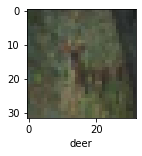

In [12]:
plot_sample(X_train, y_train, 10)

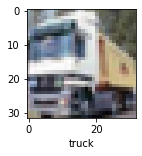

In [13]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.8079 - accuracy: 0.3597
Epoch 2/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.6215 - accuracy: 0.4285
Epoch 3/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.5378 - accuracy: 0.4581
Epoch 4/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4804 - accuracy: 0.4805
Epoch 5/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4289 - accuracy: 0.4956


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.35      0.47      1000
           1       0.87      0.12      0.21      1000
           2       0.42      0.18      0.25      1000
           3       0.23      0.49      0.32      1000
           4       0.68      0.09      0.17      1000
           5       0.32      0.42      0.36      1000
           6       0.35      0.76      0.48      1000
           7       0.56      0.46      0.50      1000
           8       0.60      0.61      0.60      1000
           9       0.46      0.64      0.54      1000

    accuracy                           0.41     10000
   macro avg       0.52      0.41      0.39     10000
weighted avg       0.52      0.41      0.39     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4741 - accuracy: 0.4727
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1188 - accuracy: 0.6079
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.9866 - accuracy: 0.6573
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8961 - accuracy: 0.6864
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8267 - accuracy: 0.7129
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7706 - accuracy: 0.7341
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7189 - accuracy: 0.7481
Epoch 8/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6741 - accuracy: 0.7670
Epoch 9/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.6319 - accuracy: 0.7790
Epoch 10/10
1563/1563 [==============================] - 60s 38m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9009 - accuracy: 0.7090


[0.9009407162666321, 0.7089999914169312]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.07464592e-04, 9.20306957e-06, 6.93363091e-03, 7.61091828e-01,
        5.89484989e-05, 7.86857903e-02, 9.19803791e-03, 7.79581242e-05,
        1.43492013e-01, 3.45236593e-04],
       [4.86464356e-04, 1.53291123e-02, 1.22851880e-08, 3.70639498e-07,
        2.98500069e-08, 2.39596378e-08, 1.01093374e-08, 2.18678020e-10,
        9.83459413e-01, 7.24473153e-04],
       [4.10090834e-02, 1.89399615e-01, 1.30781229e-03, 2.61089206e-03,
        2.32662424e-03, 1.53884408e-04, 5.80981650e-05, 3.26058333e-04,
        6.75196052e-01, 8.76119286e-02],
       [8.33360374e-01, 3.27248238e-02, 5.39324759e-03, 3.01949936e-03,
        2.16465400e-04, 1.09630506e-04, 3.93209368e-04, 5.73292664e-06,
        1.08935371e-01, 1.58416871e-02],
       [1.68667611e-06, 1.94102104e-04, 2.43864674e-02, 5.28430343e-02,
        8.10075402e-01, 7.57686002e-03, 1.04661122e-01, 2.32445876e-04,
        2.86640770e-05, 2.27922015e-07]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

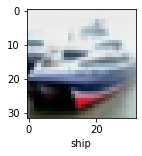

In [27]:
plot_sample(X_test, y_test,1)

In [29]:
classes[y_classes[1]]

'ship'

In [30]:
classes[y_classes[3]]

'airplane'

<h3 style='color:purple'>Exercise</h3>

Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference:
https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: [Solution](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/16_cnn_cifar10_small_image_classification/cnn_mnist_exercise_solution.ipynb)